In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn import linear_model
from sklearn.impute import SimpleImputer


# Random Forest Model of Normalized Set

In [141]:
df =pd.read_csv('../Data_CSVs/Real_Data.csv')
df

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,-0.143430,0.054564,0.447007,1.517822,1.065329,-0.363612,0.689104,-0.533509,1.329823,1.379429,...,4.726695,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,1.754538
1,0.471923,-1.595458,0.447007,-0.465347,0.569680,-0.705530,-0.212300,-0.611236,-0.172942,-0.606353,...,-0.211564,-0.118899,-0.126508,-1.059427,-0.742863,5.215915,-0.178149,-0.227948,0.718519,-0.941343
2,-0.143430,0.009894,0.447007,1.044566,0.754969,-0.192653,0.989572,-0.241446,0.753181,1.103626,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,-0.941343
3,0.471923,-1.592666,0.447007,0.180685,0.880039,-0.534571,0.388636,-1.482715,0.526019,-0.096117,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,0.855911
4,-1.064986,-0.336304,0.447007,-0.082235,0.768866,-0.363612,-0.813236,-0.241446,0.543493,-0.316760,...,-0.211564,-0.118899,-0.126508,-1.059427,1.346143,-0.191721,-0.178149,-0.227948,1.254024,-0.941343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21516,-0.370138,0.272334,0.746790,9.555667,-0.055671,0.320223,1.290039,-0.241446,2.727743,-0.604974,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,-0.941343
21517,-0.143430,-0.079448,-0.452342,32.317043,0.768866,2.200769,3.393315,-0.900944,5.523583,-0.569119,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,0.855911
21518,1.841008,0.107611,0.746790,10.569788,-1.153509,1.516934,-0.212300,-0.241446,2.028783,-0.602147,...,-0.211564,-0.118899,-0.126508,-1.059427,1.346143,-0.191721,-0.178149,-0.227948,1.254024,0.855911
21519,-0.370138,-1.017532,0.746790,16.331496,-0.055671,2.542687,-0.212300,0.222558,3.164593,-0.593486,...,-0.211564,-0.118899,-0.126508,-1.059427,-0.742863,-0.191721,5.613293,-0.227948,-0.352491,0.855911


In [70]:
y= real_df ['totalyearlycompensation']
X = real_df.drop(columns= ['totalyearlycompensation'])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [72]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17216, 27) (4305, 27) (17216,) (4305,)


In [79]:
regressor = RandomForestRegressor (n_estimators = 10, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [82]:
y_pred = regressor.predict(X_test)
y_pred

array([-0.65915718,  1.07761842,  0.27308266, ...,  1.21283451,
       -0.26252331, -0.06645997])

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9272885256564731

<function matplotlib.pyplot.show(close=None, block=None)>

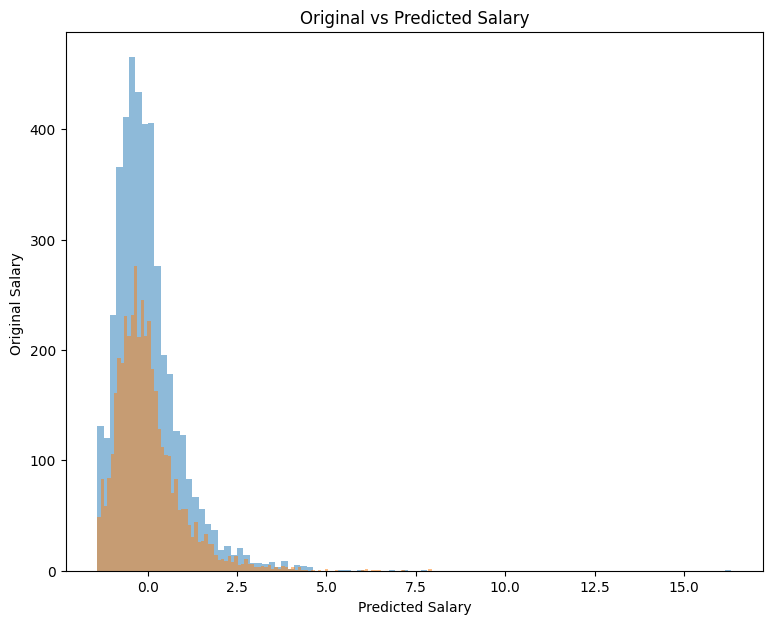

In [86]:
plt.figure(figsize=(9,7))
plt.hist(y_test,bins = 100, alpha = 0.5)
plt.hist(y_pred, bins = 100, alpha = 0.5)
plt.xlabel('Predicted Salary')
plt.ylabel('Original Salary ')
plt.title('Original vs Predicted Salary')
plt.show